In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
data = data.dropna(subset=['Time'])
years = data['Games'].astype(int).values.reshape(-1, 1)
times = data['Time'].astype(float).values

In [5]:
poly = PolynomialFeatures(degree=2)
years_poly = poly.fit_transform(years)
poly_model = LinearRegression()
poly_model.fit(years_poly, times)
predicted = poly_model.predict(years_poly)

In [6]:
future_years = np.array([[2024], [2300]])
future_years_poly = poly.transform(future_years)
future_preds = poly_model.predict(future_years_poly)

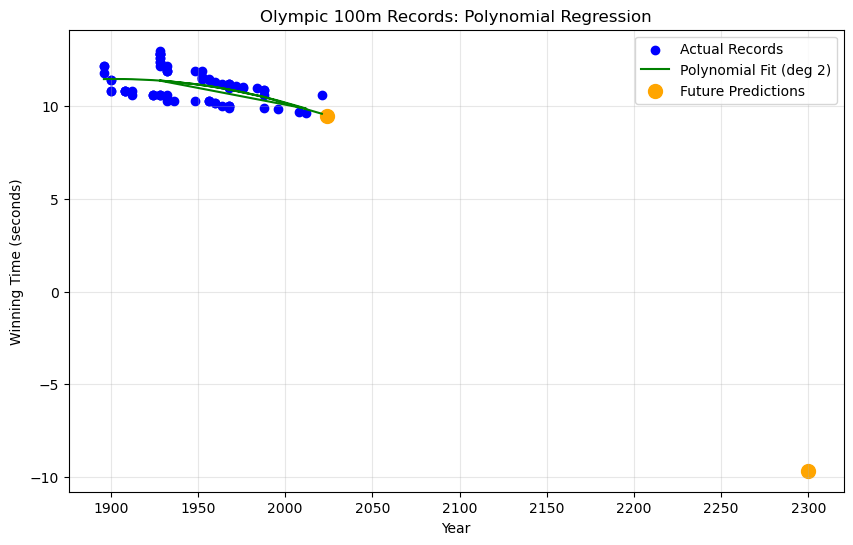

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(years, times, label='Actual Records', color='blue')
plt.plot(years, predicted, color='green', label='Polynomial Fit (deg 2)')
plt.scatter(future_years, future_preds, color='orange', s=100, label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Winning Time (seconds)')
plt.title('Olympic 100m Records: Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
print("Polynomial Model Coefficients:", poly_model.coef_)
print(f"Prediction for 2024: {future_preds[0]:.3f} seconds")
print(f"Prediction for 2300: {future_preds[1]:.3f} seconds")
print("\nModel Validity:")
print("2024 prediction: Reasonable, as it is a short extrapolation.")
print("2300 prediction: Not reliable, as it is a far extrapolation and may not reflect real-world limits.")

Polynomial Model Coefficients: [ 0.00000000e+00  5.09487302e-01 -1.33891410e-04]
Prediction for 2024: 9.502 seconds
Prediction for 2300: -9.669 seconds

Model Validity:
2024 prediction: Reasonable, as it is a short extrapolation.
2300 prediction: Not reliable, as it is a far extrapolation and may not reflect real-world limits.
